# Praktikum 3

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6408
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - loss: 0.6361
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 0.6315
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.6269
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.6223
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 0.6177
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - loss: 0.6132
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 0.6087
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 0.6042
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 0.5997
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.5953
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.5909
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 0.5865
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 0.5822
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 0.5779
Epoch 1

## Tugas 4:
- Ubah learning rate.
- Bandingkan hasil loss.

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


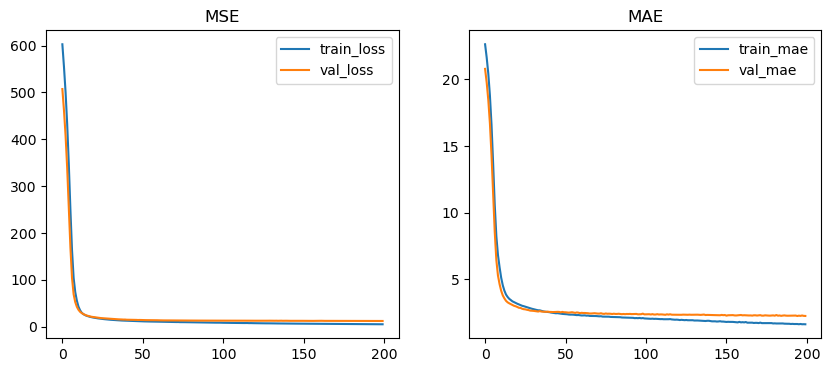

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
RMSE: 3.4691393487274134
RMSE: 3.4691393487274134


In [3]:
# MLP regresi (Keras)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.title('MSE')
plt.subplot(1,2,2)
plt.plot(h.history['mae'], label='train_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.title('MAE')
plt.show()

from sklearn.metrics import mean_squared_error
pred = model.predict(X_val)
print('RMSE:', np.sqrt(mean_squared_error(y_val, pred)))